In [1]:
#Import packages and test log grabbing with grok

from pygrok import Grok
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import geoip2.database
import plotly.express as px



text = '108.28.249.14 - - [27/Apr/2023:18:49:00 +0000] "GET /images/executive-members/etosgpvkce2b0fc9904330b616e4.jpeg HTTP/2.0" 499 0 "https://rspnepal.org/" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15"'
pattern = '\A%{IP:ip} - - \[%{HTTPDATE:timestamp}\] "%{WORD:method} %{URIPATHPARAM:path} %{URIPROTO:protocol}/%{NUMBER:version}" %{NUMBER:response_code} %{NUMBER:content_length} "%{GREEDYDATA:referrer}" "%{GREEDYDATA:user_agent}"'
grok = Grok(pattern)
print(grok.match(text))

{'ip': '108.28.249.14', 'timestamp': '27/Apr/2023:18:49:00 +0000', 'method': 'GET', 'path': '/images/executive-members/etosgpvkce2b0fc9904330b616e4.jpeg', 'protocol': 'HTTP', 'version': '2.0', 'response_code': '499', 'content_length': '0', 'referrer': 'https://rspnepal.org/', 'user_agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15'}


In [2]:
#parses and arranges the logs into a dictionary of lists

data = {'ip':[],
        'timestamp':[],
        'method':[],
        'path':[],
        'protocol':[],
        'version':[],
        'response_code':[],
        'content_length':[],
        'referrer':[],
        'user_agent':[]
       }


#f = open("oa_access.log", "r")
#f = open("logs/api.rspnepal.org.access.log.1", "r")
f =open("logs/kathmandukhabar.com.access.log.1","r")
c=0
for x in f:
    a = grok.match(x)
    try:
        for i in a:
            data[i].append(a[i])
    except TypeError:  #incase of failure to parse some logs continue
        c = c+ 1
        continue
print("total none value detected is " + str(c))
 




total none value detected is 74


In [3]:
# generates a dataframe
df = pd.DataFrame(data)
display(df)

,ip,timestamp,method,path,protocol,version,response_code,content_length,referrer,user_agent
0,35.209.205.10,06/Jun/2023:06:31:47 +0000,GET,/not-found,HTTP,1.1,302,406,-,Buck/2.3.2; (+https://app.hypefactors.com/medi...
1,35.208.101.249,06/Jun/2023:06:31:47 +0000,GET,/not-found,HTTP,1.1,302,406,-,Buck/2.3.2; (+https://app.hypefactors.com/medi...
2,35.209.205.10,06/Jun/2023:06:31:47 +0000,GET,/not-found,HTTP,1.1,302,406,-,Buck/2.3.2; (+https://app.hypefactors.com/medi...
3,35.208.101.249,06/Jun/2023:06:31:48 +0000,GET,/not-found,HTTP,1.1,302,406,-,Buck/2.3.2; (+https://app.hypefactors.com/medi...
4,35.209.205.10,06/Jun/2023:06:31:48 +0000,GET,/not-found,HTTP,1.1,302,406,-,Buck/2.3.2; (+https://app.hypefactors.com/medi...
...,...,...,...,...,...,...,...,...,...,...
141472,35.208.222.203,07/Jun/2023:06:31:32 +0000,GET,/not-found,HTTP,1.1,302,406,-,Buck/2.3.2; (+https://app.hypefactors.com/medi...
141473,27.34.68.70,07/Jun/2023:06:31:32 +0000,GET,/not-found,HTTP,1.1,302,406,https://kathmandukhabar.com/frontend/css/main.css,Mozilla/5.0 (Linux; Android 10; M2010J19SI Bui...
141474,35.208.222.203,07/Jun/2023:06:31:32 +0000,GET,/not-found,HTTP,1.1,302,406,-,Buck/2.3.2; (+https://app.hypefactors.com/medi...
141475,27.34.68.70,07/Jun/2023:06:31:32 +0000,GET,/not-found,HTTP,1.1,302,406,https://kathmandukhabar.com/frontend/css/main.css,Mozilla/5.0 (Linux; Android 10; M2010J19SI Bui...


In [4]:
df.describe()

,ip,timestamp,method,path,protocol,version,response_code,content_length,referrer,user_agent
count,141477,141477,141477,141477,141477,141477,141477,141477,141477,141477
unique,2211,37053,4,10465,1,2,10,6974,664,608
top,35.208.88.181,06/Jun/2023:11:31:49 +0000,GET,/not-found,HTTP,1.1,302,406,-,Buck/2.3.2; (+https://app.hypefactors.com/medi...
freq,24524,84,141397,98600,141477,141458,100499,93754,104511,78252


In [5]:
#display most active remote clients
%matplotlib inline

ips = df['ip'].value_counts()
top_ips = ips.iloc[0:15]
#horizontal_bar= top_ips.plot(kind='barh',figsize=(12,6))


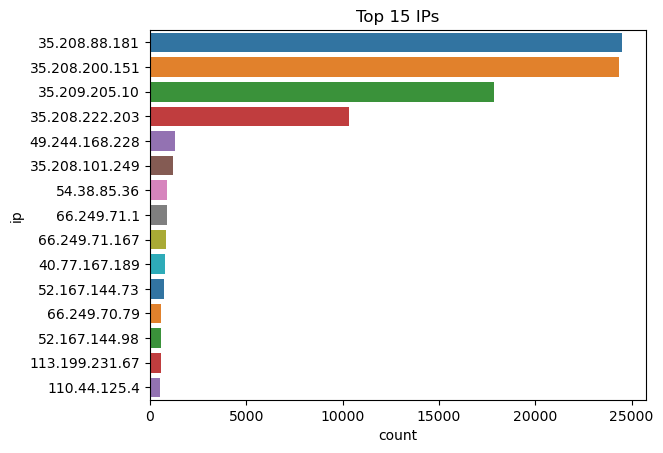

In [6]:
import seaborn as sns
top_ips = df.ip.value_counts().head(15)
filtered_df = df[df['ip'].isin(top_ips.index)]
category_counts = filtered_df.ip.value_counts()
sorted_categories = category_counts.index
sorted_categories


sns.countplot(y="ip",palette="tab10",order=sorted_categories, data=df[df.ip.isin(top_ips.index)]).set_title('Top 15 IPs');

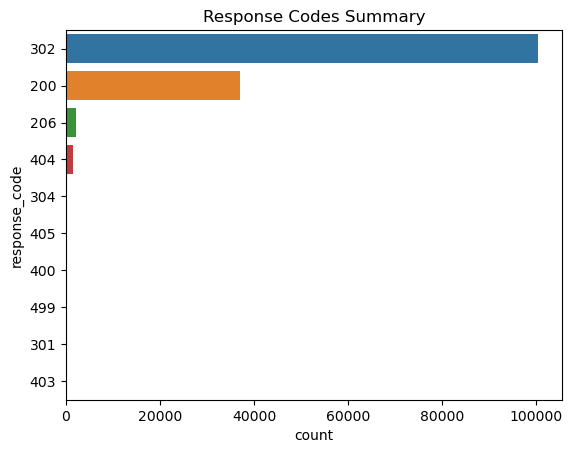

In [7]:
top_5_ips=  ips.iloc[1:2]
sns.color_palette("tab10")
category_counts = df.response_code.value_counts()
sorted_categories = category_counts.index
sns.countplot(y="response_code", data=df,palette="tab10", order=sorted_categories).set_title('Response Codes Summary');

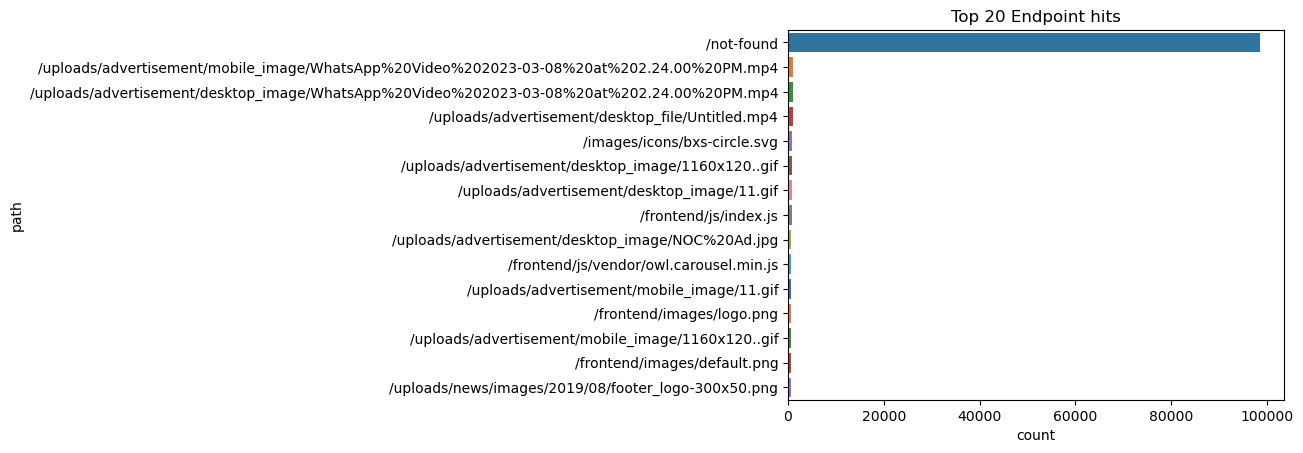

In [8]:

top_20_paths = df.path.value_counts().head(15)
top_20_paths
filtered_df = df[df['path'].isin(top_20_paths.index)]
category_counts = filtered_df['path'].value_counts()
sorted_categories = category_counts.index


sns.countplot(y="path",palette="tab10", data=df[df.path.isin(top_20_paths.index)], order =sorted_categories ).set_title('Top 20 Endpoint hits');


In [9]:
geoip_df= df.ip.value_counts()
mmdb_path = 'mmdb/GeoLite2-City.mmdb'

reader = geoip2.database.Reader(mmdb_path)


geoip_data = {
    'ip':[],
    'country':[],
    'city':[],
    'latitude':[],
    'longitude':[],
   
}

for ip in geoip_df.index:

    try:
        # Perform the lookup for the given IP address
        response = reader.city(ip)

        # Access the geolocation information
        country = response.country.name
        city = response.city.name
        latitude = response.location.latitude
        longitude = response.location.longitude
        
        geoip_data['ip'].append(ip)
        geoip_data['country'].append(country)
        geoip_data['city'].append(city)
        geoip_data['latitude'].append(latitude)
        geoip_data['longitude'].append(longitude)


        # Print the retrieved information

    except geoip2.errors.AddressNotFoundError:
        print(f"No geolocation information found for IP: {ip}")
reader.close()

    


No geolocation information found for IP: 103.197.104.49
No geolocation information found for IP: 169.48.198.35
No geolocation information found for IP: 169.60.2.119
No geolocation information found for IP: 169.60.2.107
No geolocation information found for IP: 169.60.172.120
No geolocation information found for IP: 169.60.172.115
No geolocation information found for IP: 169.48.198.46
No geolocation information found for IP: 169.60.2.120
No geolocation information found for IP: 169.60.172.124


In [10]:
geoip_df = pd.DataFrame(geoip_data)
geoip_df

,ip,country,city,latitude,longitude
0,35.208.88.181,United States,Council Bluffs,41.2591,-95.8517
1,35.208.200.151,United States,Council Bluffs,41.2591,-95.8517
2,35.209.205.10,United States,Council Bluffs,41.2591,-95.8517
3,35.208.222.203,United States,Council Bluffs,41.2591,-95.8517
4,49.244.168.228,Nepal,Rautahat,26.5676,86.5308
...,...,...,...,...,...
2197,114.119.134.95,Singapore,None,1.3673,103.8014
2198,114.119.136.68,Singapore,None,1.3673,103.8014
2199,114.119.138.172,Singapore,None,1.3673,103.8014
2200,114.119.148.160,Singapore,None,1.3673,103.8014


In [11]:
geo_df = df.loc[:,['ip']]
mapping_dict = geoip_df.set_index('ip')['country'].to_dict()
mapping_dict

geo_df['country'] = geo_df['ip'].map(geoip_df.set_index('ip')['country'])
geo_df['city'] = geo_df['ip'].map(geoip_df.set_index('ip')['city'])
geo_df['latitude'] = geo_df['ip'].map(geoip_df.set_index('ip')['latitude'])
geo_df['longitude'] = geo_df['ip'].map(geoip_df.set_index('ip')['longitude'])


geo_df

,ip,country,city,latitude,longitude
0,35.209.205.10,United States,Council Bluffs,41.2591,-95.8517
1,35.208.101.249,United States,Council Bluffs,41.2591,-95.8517
2,35.209.205.10,United States,Council Bluffs,41.2591,-95.8517
3,35.208.101.249,United States,Council Bluffs,41.2591,-95.8517
4,35.209.205.10,United States,Council Bluffs,41.2591,-95.8517
...,...,...,...,...,...
141472,35.208.222.203,United States,Council Bluffs,41.2591,-95.8517
141473,27.34.68.70,Nepal,Kathmandu,27.6974,85.3318
141474,35.208.222.203,United States,Council Bluffs,41.2591,-95.8517
141475,27.34.68.70,Nepal,Kathmandu,27.6974,85.3318


In [12]:
test = df

geo_df = df.loc[:,['ip']]
mapping_dict = geoip_df.set_index('ip')['country'].to_dict()
mapping_dict

test['country'] = test['ip'].map(geoip_df.set_index('ip')['country'])
test['city'] = test['ip'].map(geoip_df.set_index('ip')['city'])
test['latitude'] = test['ip'].map(geoip_df.set_index('ip')['latitude'])
test['longitude'] = test['ip'].map(geoip_df.set_index('ip')['longitude'])

df_loc = test
df_loc

,ip,timestamp,method,path,protocol,version,response_code,content_length,referrer,user_agent,country,city,latitude,longitude
0,35.209.205.10,06/Jun/2023:06:31:47 +0000,GET,/not-found,HTTP,1.1,302,406,-,Buck/2.3.2; (+https://app.hypefactors.com/medi...,United States,Council Bluffs,41.2591,-95.8517
1,35.208.101.249,06/Jun/2023:06:31:47 +0000,GET,/not-found,HTTP,1.1,302,406,-,Buck/2.3.2; (+https://app.hypefactors.com/medi...,United States,Council Bluffs,41.2591,-95.8517
2,35.209.205.10,06/Jun/2023:06:31:47 +0000,GET,/not-found,HTTP,1.1,302,406,-,Buck/2.3.2; (+https://app.hypefactors.com/medi...,United States,Council Bluffs,41.2591,-95.8517
3,35.208.101.249,06/Jun/2023:06:31:48 +0000,GET,/not-found,HTTP,1.1,302,406,-,Buck/2.3.2; (+https://app.hypefactors.com/medi...,United States,Council Bluffs,41.2591,-95.8517
4,35.209.205.10,06/Jun/2023:06:31:48 +0000,GET,/not-found,HTTP,1.1,302,406,-,Buck/2.3.2; (+https://app.hypefactors.com/medi...,United States,Council Bluffs,41.2591,-95.8517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141472,35.208.222.203,07/Jun/2023:06:31:32 +0000,GET,/not-found,HTTP,1.1,302,406,-,Buck/2.3.2; (+https://app.hypefactors.com/medi...,United States,Council Bluffs,41.2591,-95.8517
141473,27.34.68.70,07/Jun/2023:06:31:32 +0000,GET,/not-found,HTTP,1.1,302,406,https://kathmandukhabar.com/frontend/css/main.css,Mozilla/5.0 (Linux; Android 10; M2010J19SI Bui...,Nepal,Kathmandu,27.6974,85.3318
141474,35.208.222.203,07/Jun/2023:06:31:32 +0000,GET,/not-found,HTTP,1.1,302,406,-,Buck/2.3.2; (+https://app.hypefactors.com/medi...,United States,Council Bluffs,41.2591,-95.8517
141475,27.34.68.70,07/Jun/2023:06:31:32 +0000,GET,/not-found,HTTP,1.1,302,406,https://kathmandukhabar.com/frontend/css/main.css,Mozilla/5.0 (Linux; Android 10; M2010J19SI Bui...,Nepal,Kathmandu,27.6974,85.3318


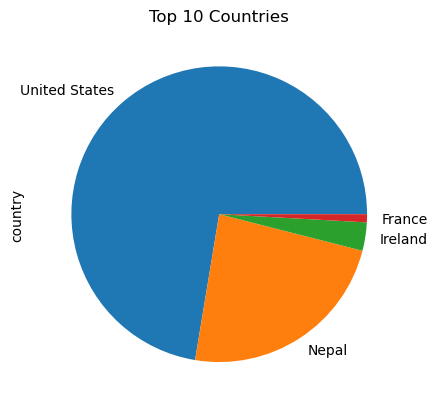

In [13]:
pie = df_loc.country.value_counts().head(4).plot(kind='pie');
pie.set_title('Top 10 Countries');


In [14]:
df_loc[df_loc.country == 'Singapore'].ip.value_counts()

109.123.232.34     45
8.222.209.38       37
114.119.132.218    10
114.119.134.207    10
114.119.142.43      5
                   ..
114.119.139.220     1
114.119.152.171     1
114.119.139.183     1
114.119.156.16      1
114.119.144.178     1
Name: ip, Length: 725, dtype: int64

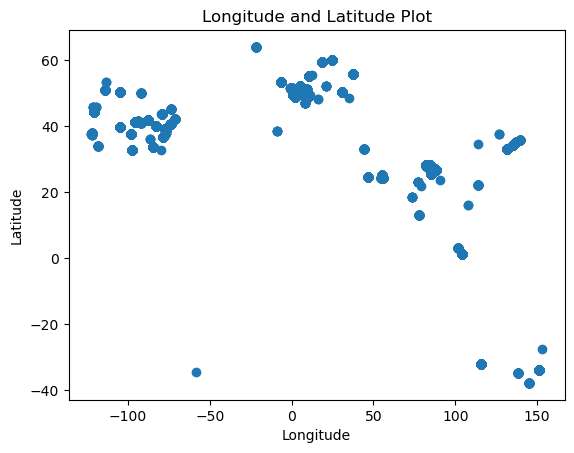

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample dataframe with longitude and latitude columns


# Plotting longitude and latitude
plt.scatter(test['longitude'], test['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Longitude and Latitude Plot')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a sample dataframe with longitude and latitude columns
data = {
    'longitude': [-122.4194, -73.935242, 139.6917, -0.1276],
    'latitude': [37.7749, 40.730610, 35.6895, 51.5074]
}

df = pd.DataFrame(data)

# Create the map
plt.figure(figsize=(15, 15))  # Adjust the figure size as desired
map = Basemap(projection='merc', lat_0=0, lon_0=0, resolution='h', llcrnrlon=-180, urcrnrlon=180, llcrnrlat=-80, urcrnrlat=80)

# Draw coastlines, countries, and states
map.drawcoastlines(linewidth=0.5)
map.fillcontinents(color='lightgray', lake_color='white')
map.drawcountries()

# Convert longitude and latitude to map coordinates
x, y = map(test['longitude'].values, test['latitude'].values)

# Plot the points on the map
map.scatter(x, y, color='red', marker='o')

# Show the map
plt.title('Longitude and Latitude Plot on World Map')
plt.show()
